In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("mutagenicity_kNN.csv")

In [3]:
data.head()

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5764 non-null   int64  
 1   Id                   5764 non-null   int64  
 2   CAS                  5764 non-null   object 
 3   SMILES               5764 non-null   object 
 4   Status               5764 non-null   object 
 5   Experimental value   5764 non-null   int64  
 6   Predicted value      5764 non-null   object 
 7   NumValenceElectrons  5764 non-null   int64  
 8   qed                  5764 non-null   float64
 9   TPSA                 5764 non-null   float64
 10  MolMR                5764 non-null   float64
 11  BalabanJ             5764 non-null   float64
 12  BertzCT              5764 non-null   float64
 13  MolWt                5764 non-null   float64
 14  MolLogP              5764 non-null   float64
dtypes: float64(7), int64(4), object(4)
mem

In [5]:
data = pd.read_csv("mutagenicity_kNN.csv")
# ermove MOlvt because it has not much effect
data = data.drop(columns=["Unnamed: 0", "Id", "CAS", "SMILES", "Status","MolWt" ,"Predicted value"])  
X = data.drop(columns=["Experimental value"])
y = data["Experimental value"] 

In [6]:
data.corr()

,Experimental value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolLogP
Experimental value,1.000000,-0.010744,-0.143388,0.065954,0.028477,-0.064472,0.171867,0.057119
NumValenceElectrons,-0.010744,1.000000,-0.199546,0.604660,0.961815,-0.445799,0.805632,0.418071
qed,-0.143388,-0.199546,1.000000,-0.215041,-0.187520,-0.063217,-0.208133,-0.082789
TPSA,0.065954,0.604660,-0.215041,1.000000,0.441035,-0.072662,0.450214,-0.281503
MolMR,0.028477,0.961815,-0.187520,0.441035,1.000000,-0.514160,0.865409,0.595573
BalabanJ,-0.064472,-0.445799,-0.063217,-0.072662,-0.514160,1.000000,-0.559053,-0.334763
BertzCT,0.171867,0.805632,-0.208133,0.450214,0.865409,-0.559053,1.000000,0.534178
MolLogP,0.057119,0.418071,-0.082789,-0.281503,0.595573,-0.334763,0.534178,1.000000


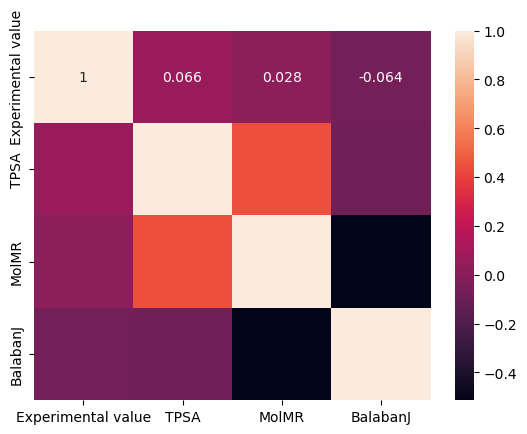

In [7]:
heatmap = sns.heatmap(data[["Experimental value","TPSA","MolMR","BalabanJ"]].corr(),annot=True)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:

param_grid = {'n_neighbors': range(1, 25)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k: {best_k}")

Optimal k: 13


In [10]:

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)

In [11]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 70.7719
Precision: 73.3234
Recall: 0.7569
F1-score: 0.7449


In [12]:
X

,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolLogP
0,52,0.463602,43.14,38.1064,3.003401,244.429658,2.24820
1,52,0.359544,69.16,37.5088,3.003401,242.429658,1.17700
2,52,0.470728,63.37,34.7612,3.003401,241.674771,1.30040
3,58,0.432586,43.14,45.7274,2.913802,257.648013,2.48970
4,58,0.479785,43.14,42.4744,2.913802,253.299498,2.15720
...,...,...,...,...,...,...,...
5759,102,0.485090,78.53,69.3560,2.668492,627.435628,-1.05750
5760,42,0.495987,17.07,40.3720,3.791118,85.425922,2.59030
5761,44,0.568556,12.03,40.4577,2.447473,28.870765,1.36580
5762,184,0.264581,185.59,125.3525,2.552977,1169.342047,3.84768


## now we will modify scoring factor for grid search in acuracy or precision basis

In [14]:

param_grid = {'n_neighbors': range(1, 25)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=['accuracy', 'precision'], refit=False)
grid_search.fit(X_train, y_train)

best_k_accuracy = max(grid_search.cv_results_['mean_test_accuracy'], key=lambda x: x)
best_k_precision = max(grid_search.cv_results_['mean_test_precision'], key=lambda x: x)

print(f"Optimal k based on Accuracy: {best_k_accuracy}")
print(f"Optimal k based on Precision: {best_k_precision}")


Optimal k based on Accuracy: 0.6894372072582332
Optimal k based on Precision: 0.7818956904421742


In [35]:
# when k is closer to best acuracy parameter
knn_best = KNeighborsClassifier(n_neighbors=7)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("When acuracy is more important")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


When acuracy is more important
Accuracy: 71.0321
Precision: 73.3038
Recall: 0.7646
F1-score: 0.7485


In [37]:
# when k is closer to best precision parameter
knn_best = KNeighborsClassifier(n_neighbors=8)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("When precision is more important")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


When precision is more important
Accuracy: 71.5525
Precision: 77.3810
Recall: 0.7000
F1-score: 0.7351


In [39]:
# weighted KNN
knn_best = KNeighborsClassifier(n_neighbors=16,weights='distance')
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("When we change weights")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

When we change weights
Accuracy: 72.2463
Precision: 74.4807
Recall: 0.7723
F1-score: 0.7583
